# OpenCV
OpenCV는 Open Source Computer Vision Library의 약어로 오픈소스 컴퓨터 비전 라이브러리입니다. 실시간 영상 처리에 중점을 둔 영상 처리 라이브러리로서, Apache 2.0 라이선스하에 배포되어 학술적 용도 외에도 오픈소스 BSD 허가서 하에서 상업적 용도로도 사용할 수 있습니다.  라이브러리는 윈도, 리눅스 등에서 사용 가능한 크로스 플랫폼이며 OpenCV TensorFlow , Torch / PyTorch 및 Caffe의 딥러닝 프레임워크를 지원하기때문에 물체 인식, 얼굴 인식, 제스처 인식을 비롯해 자율주행 자동차, OCR 판독기, 불량 검사기 등에 활용할 수 있습니다.

## 설치
---
```pip install opencv-python```

BGR로 이미지를 읽어오고, Video capture와 같은 기능 지원이 잘되어 있습니다.  
C++에서 OpenCV를 배우고 사용시 익숙해지기 쉽고(반대도 비슷함) numpy array 인덱싱을 이용해 이미지에 대한 전처리가 가능하기에 좀 더 자유롭게 이미지 전처리 가능합니다.  
Pillow와 비교한다면 전체적으로 OpenCV 라이브러리의 성능이 더 좋고, 함수가 더 직관적입니다. (사용자 관점마다 다르겠지만..)  
*물론 Pillow-SIMD 라이브러리의 경우 OpenCV와 대등한 성능을 내거나 더 좋은 성능을 내는 함수도 많습니다.*  
**영상처리**를 포함한다면 OpenCV가 유용합니다.

In [6]:
import cv2
import os

# 설치 버전
print(cv2.__version__)

result_dir = 'result'

# Make Directory
if not os.path.exists(result_dir):
    os.makedirs(result_dir)

4.5.3


### 이미지 열기
imread(filename, flags)함수를 사용하여 이미지를 불러옵니다. image의 타입은 **Numpy 배열(numpy.ndarray)** 입니다.

In [7]:
cv2_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)
print(type(cv2_image))

<class 'numpy.ndarray'>


imshow()함수는 이미지를 출력하기위한 윈도우 창을 호출하기위해 사용됩니다. 윈도우 창이름을 같은 값으로 지정하면 동일한 윈도우로 간주되어 하나의 윈도우창만 열리게 되니, 여러개의 이미지 창을 실행할 때는 라벨명을 다르게 해야 합니다.

In [15]:
# cv2.namedWindow('image1',cv2.WINDOW_NORMAL)
cv2.imshow('image1', cv2_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Matplotlib를 사용하여 출력이 가능한데 imshow 함수를 이용하면 기본적으로 BGR로 이미지를 불러오기때문에 cv2.cvtColor()함수를 사용하여 RGB로 변경이 필요합니다.

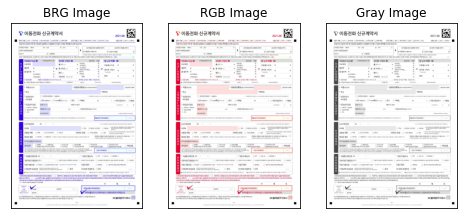

In [24]:
import matplotlib.pyplot as plt

rgb_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 5))

plt.subplot(1,3,1) # (1행, 3열, 1번째) 위치시킴
plt.imshow(cv2_image) 
plt.title('BRG Image')
plt.xticks([]), plt.yticks([]) # x,y 축 정보 제거

plt.subplot(1,3,2)
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.xticks([]), plt.yticks([])

# Gray Image 추가
gray_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_GRAYSCALE)
plt.subplot(1,3,3)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.xticks([]), plt.yticks([])

plt.show()

편의를 위해 함수로 만들어 사용합니다.

In [23]:
# 이미지 출력함수 정의
def img_show(img, title='image', figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

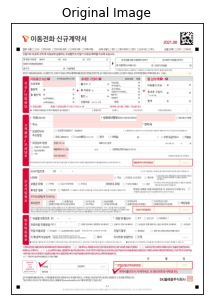

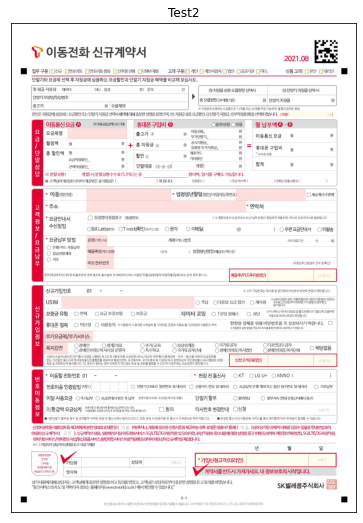

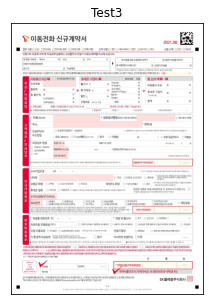

In [27]:
img_show(cv2_image, 'Original Image')
img_show(cv2_image, 'Test2',(9,9)) #figsize change
img_show(cv2_image, 'Test3') #figsizw change

### 이미지 속성

In [28]:
print('이미지 사이즈 : {}'.format(cv2_image.shape))
print('이미지 dtype : {}'.format(cv2_image.dtype))  # Default type is unit8
print('이미지 Width : {}'.format(cv2_image.shape[0]))
print('이미지 Height : {}'.format(cv2_image.shape[1]))
print('이미지 전체 픽셀 개수 : {}'.format(cv2_image.size))

이미지 사이즈 : (2346, 1658, 3)
이미지 dtype : uint8
이미지 Width : 2346
이미지 Height : 1658
이미지 전체 픽셀 개수 : 11669004


### 이미지 크기 변경
interpolation 속성
 > cv2.INTER_NEAREST (이웃 보간법)  
 > **cv2.INTER_LINEAR (쌍 선형 보간법)**  
 > cv2.INTER_LINEAR_EXACT (비트 쌍 선형 보간법)  
 > cv2.INTER_CUBIC (바이큐빅 보간법)  
 > cv2.INTER_AREA (영역 보간법)  
 > cv2.INTER_LANCZOS4 (Lanczos 보간법)  

일반적으로 쌍 선형 보간법이 가장 많이 사용됩니다.

In [49]:
# 절대 크기로 변경하는 방법 (fx, fy)
resize_image = cv2.resize(cv2_image, dsize=(276, 391), interpolation=cv2.INTER_AREA)

# 상대 크기로 변경하는 방법 - 입력 이미지의 크기와 비례하도록 너비와 높이가 계산
resize_image2 = cv2.resize(cv2_image, dsize=(0, 0), fx=0.5, fy=0.3, interpolation=cv2.INTER_LINEAR)

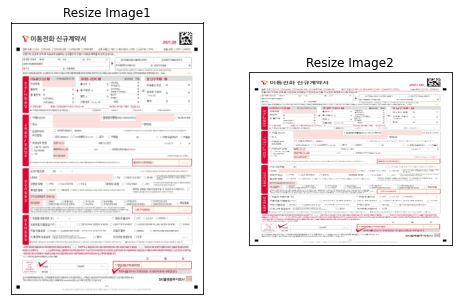

In [50]:
img_show([resize_image, resize_image2], ['Resize Image1', 'Resize Image2'])

### 이미지 회전
이미지 회전을 위해 2x3 회전 행렬 생성 함수인 cv2.getRotationMatrix2D(center, angle, scale)를 이용하여 회전 변환 행렬을 계산합니다. 아핀 변환 함수(cv2.warpAffine)로 회전 변환을 계산합니다. 아래 코드는 이미지의 중심점을 기준으로 45도 회전하면서 0.5배로 확대하는 이미지를 반환합니다.  앵글(angle) 회전각도값이 양수값인 경우 시계반대방향으로 회전합니다. cv2.getRotationMatrix2D() 결과에서 나온 변환행렬을 cv2.warpAffine()함수에 적용합니다.

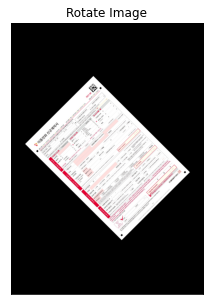

In [66]:
import cv2

cv2_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)

height, width, channel = cv2_image.shape
matrix = cv2.getRotationMatrix2D((width / 2, height / 2), 45, 0.5)
rotate_image = cv2.warpAffine(cv2_image, matrix, (width, height))

img_show(rotate_image, 'Rotate Image')

### 이미지 상하, 좌우 대칭(Flip)

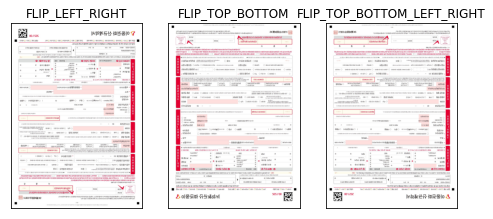

In [67]:
import cv2

cv2_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)

img_show([cv2.flip(cv2_image, 1), cv2.flip(cv2_image, 0), cv2.flip(cv2_image, -1)], ['FLIP_LEFT_RIGHT', 'FLIP_TOP_BOTTOM', 'FLIP_TOP_BOTTOM_LEFT_RIGHT']) #좌우대칭, 상하반전, 상하좌우대칭

### 이미지 자르기(Crop)
리스트 혹은 배열의 특정 영역을 자르는 방식과 동일합니다.

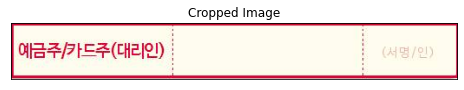

In [69]:
cv2_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)

# y1, y2, x1, x2
cropped_image = cv2_image[1180:1245, 1045:1560]
img_show(cropped_image, 'Cropped Image')

### Draw Box

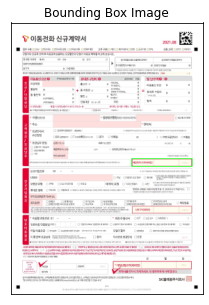

In [78]:
cv2_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)
resize_image = cv2.resize(cv2_image, dsize=(276, 391), interpolation=cv2.INTER_AREA)

bounding_box = (173, 196, 87, 11)

gt_x1, gt_y1, gt_w, gt_h = bounding_box
cv2.rectangle(resize_image, (int(gt_x1), int(gt_y1)), (int(gt_x1 + gt_w), int(gt_y1 + gt_h)), (0, 255, 0), 1)

img_show(resize_image, 'Bounding Box Image')

### 이미지 필터링 & 효과
OpenCV는 영상처리를 위해 다양하고 강력한 필터링과 효과 기능을 제공합니다.
* blur()
* GaussianBlur()
* medianBlur()
* bilateralFilter()
* Sobel()
* Laplacian()
* Canny()
* ...

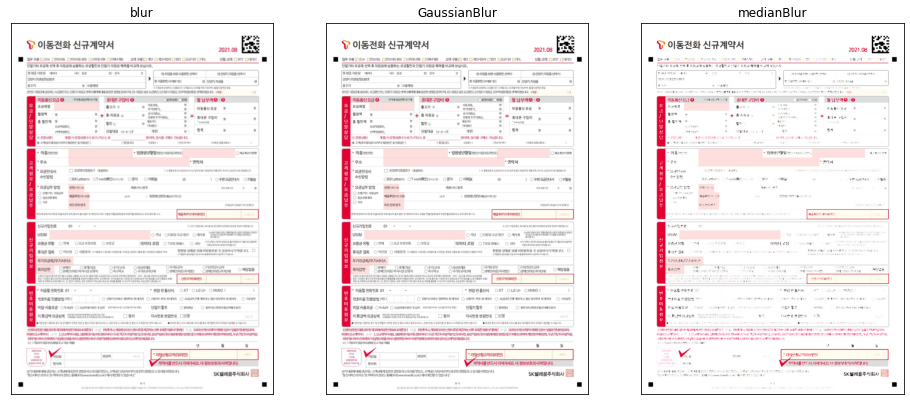

In [87]:
cv2_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)
blur_image = cv2.blur(cv2_image, (5,5))
gaussian_blur_image = cv2.GaussianBlur(cv2_image, (5,5), sigmaX=0)
median_blur_image = cv2.medianBlur(cv2_image, ksize=5)

img_show([blur_image, gaussian_blur_image, median_blur_image], ['blur', 'GaussianBlur', 'medianBlur'], figsize=(16, 10))

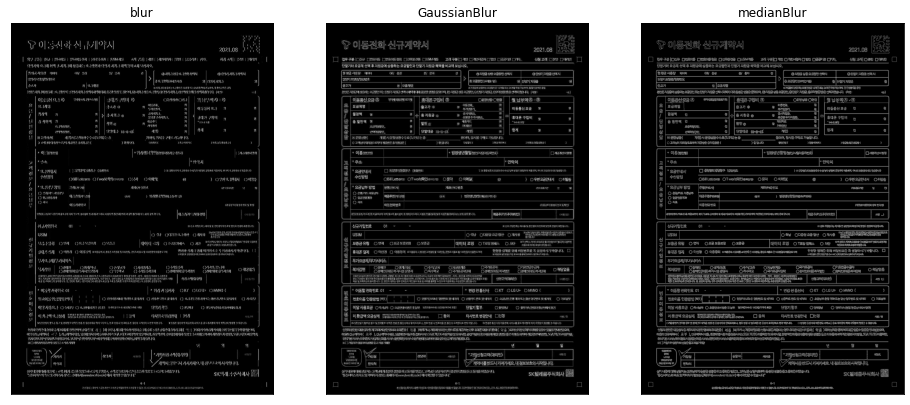

In [89]:
cv2_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray_image, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray_image, cv2.CV_8U, ksize=3)
canny = cv2.Canny(cv2_image, 100, 255)

img_show([sobel, laplacian, canny], ['sobel', 'laplacian', 'canny'], figsize=(16, 10))

### 이미지 합치기
* vconcat([image1, image2]) : 수직 방향으로 붙이기
* hconcat([image1, image2]) : 수평 방향으로 붙이기

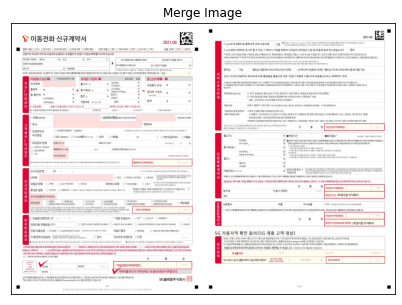

In [90]:
cv2_image1 = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)
cv2_image2 = cv2.imread('images/test_image/image_2.jpg', cv2.IMREAD_COLOR)

merge_image = cv2.hconcat([cv2_image1, cv2_image2])

img_show(merge_image, 'Merge Image')

### 이미지 저장

In [91]:
cv2.imwrite(os.path.join(result_dir, "cv2_merge_image.jpg"), merge_image)

True

### 이미지 변환

In [103]:
from PIL import Image
from PyQt5.QtGui import QImage

## Pillow Image -> CV2
def convert_from_image_to_cv2(img):
    return np.asarray(img)

## CV2 -> Pillow Image
def convert_from_cv2_to_image(img):
    return Image.fromarray(img)

def convert_from_QImage_to_cv2(img):
    '''  Converts a QImage into an opencv MAT format  '''

    img = img.convertToFormat(4)

    width = img.width()
    height = img.height()

    ptr = img.bits()
    ptr.setsize(img.byteCount())
    arr = np.array(ptr).reshape(height, width, 4)  #  Copies the data
    return arr

def convert_cv2_to_QImage(img):
    '''  Converts a opencv MAT into an QImage format  '''
    if len(img.shape) < 3:
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    height, width, channel = img.shape
    bytesPerLine = 3 * width
    qImg = QImage(img.data, width, height, bytesPerLine, QImage.Format_RGB888)
    return qImg

<class 'PIL.Image.Image'>


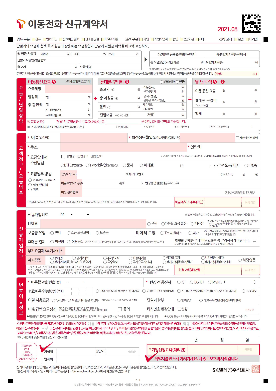

In [108]:
cv2_image = cv2.imread('images/test_image/image_1.jpg', cv2.IMREAD_COLOR)
rgb_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
resize_image = cv2.resize(rgb_image, dsize=(276, 391))

pil_image = convert_from_cv2_to_image(resize_image)
print(type(pil_image))

pil_image

In [107]:
qimage = convert_cv2_to_QImage(cv2_image)
print(type(qimage))

<class 'PyQt5.QtGui.QImage'>
